In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
store_data2 =pd.read_csv("/Users/ds_learner__22/Desktop/Unsupervised project/Superstore_crit.csv")
store_data2.head(1)

,Row ID,Order ID,Oyears,Odays,Omonths,Order Date,SYear,SMonth,SDays,Ship Date,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016,8,11,11/8/2016,2016,11,11,11/11/2016,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [3]:
store_data2_new=store_data2.drop(columns=['Row ID','Country','Postal Code','Order ID','Order Date','Ship Date'], inplace=False)
store_data2_new.head(1)

,Oyears,Odays,Omonths,SYear,SMonth,SDays,Ship Mode,Customer ID,Customer Name,Segment,...,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016,8,11,2016,11,11,Second Class,CG-12520,Claire Gute,Consumer,...,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [4]:
#let's check the missing values
store_data2_new.isnull().sum()

Oyears           0
Odays            0
Omonths          0
SYear            0
SMonth           0
SDays            0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
### let's look at the distribution of numerical values
store_data2_new.describe()

,Oyears,Odays,Omonths,SYear,SMonth,SDays,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2015.722233,15.468481,7.809686,2015.737442,7.743146,15.883730,229.858001,3.789574,0.156203,28.656896
std,1.123555,8.748327,3.284654,1.126141,3.340476,8.802677,623.245101,2.225110,0.206452,234.260108
min,2014.000000,1.000000,1.000000,2014.000000,1.000000,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015.000000,8.000000,5.000000,2015.000000,5.000000,8.000000,17.280000,2.000000,0.000000,1.728750
50%,2016.000000,15.000000,9.000000,2016.000000,9.000000,16.000000,54.490000,3.000000,0.200000,8.666500
75%,2017.000000,23.000000,11.000000,2017.000000,11.000000,24.000000,209.940000,5.000000,0.200000,29.364000
max,2017.000000,31.000000,12.000000,2018.000000,12.000000,31.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#let's check if there is any abnormal values in  the categorical variables:
store_data2_new_cat=store_data2_new[['Ship Mode','Customer ID','Customer Name','Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name']]

for i in store_data2_new_cat.columns:
    print(store_data2_new_cat[i].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 'GZ-14470'
 'LC-16870' 'JM-15250' 'PA-19060' 'CV-12805' 'CL-12565' 'RC-19960'
 'DK-13090' 'GG-14650' 'SC-20725' 'AD-10180' 'PF-19165' 'TS-21610'
 'LS-16975' 'DW-13585' 'LC-16885' 'JD-15895' 'SH-19975' 'SG-20080'
 'HA-14920' 'MG-17680' 'JE-16165' 'TW-21025' 'SP-20650' 'NK-18490'
 'DB-13060' 'NP-18670' 'TT-21070' 'EM-13960' 'RD-19900' 'MJ-17740'
 'BM-11140' 'CS-12130' 'JB-15400' 'SJ-20500' 'JK-15640' 'DK-13150'
 'R

In [7]:
#transform categorical labels to numerical labels
store_data2_new_cat=store_data2_new[['Ship Mode','Customer ID','Customer Name','Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name']]

encoders={}
for col_name in store_data2_new_cat.columns:
    series = store_data2_new_cat[col_name]
    label_encoder = LabelEncoder()
    store_data2_new_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/1425942447.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data2_new_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),


In [8]:
store_data2_new_cat

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,2,143,166,0,194,15,2,12,0,4,386
1,2,143,166,0,194,15,2,55,0,5,839
2,2,237,201,1,266,3,3,946,1,10,1433
3,3,705,687,0,153,8,2,319,0,16,366
4,3,705,687,0,153,8,2,1316,1,14,573
...,...,...,...,...,...,...,...,...,...,...,...
9989,2,737,758,0,295,8,2,200,0,9,1586
9990,3,190,202,0,104,3,3,164,0,9,1535
9991,3,190,202,0,104,3,3,1816,2,13,47
9992,3,190,202,0,104,3,3,1247,1,12,929


In [9]:
# Handling Missing Values using Knn for both categorical and numerical labels 
#Numerical values
store_data2_new_num=store_data2_new[['Oyears','Odays','Omonths','SYear','SMonth','SDays','Sales','Quantity','Discount','Profit']]
imputer = KNNImputer(n_neighbors=5)
store_data2_new_num.loc[:]=imputer.fit_transform(store_data2_new_num)
#categorical values
imputer = KNNImputer(n_neighbors=1)
store_data2_new_cat.loc[:]=imputer.fit_transform(store_data2_new_cat)


/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/3897786791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data2_new_num.loc[:]=imputer.fit_transform(store_data2_new_num)
/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/3897786791.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  store_data2_new_num.loc[:]=imputer.fit_transform(store_data2_new_num)
/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/3897786791.py:8: SettingWithCopyWarning: 
A value is trying to be se

In [10]:
#concatenate the data
store_data2_new1=pd.concat([store_data2_new_cat,store_data2_new_num], axis=1)

In [11]:
store_data2_new1

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,...,Oyears,Odays,Omonths,SYear,SMonth,SDays,Sales,Quantity,Discount,Profit
0,2,143,166,0,194,15,2,12,0,4,...,2016.0,8.0,11.0,2016.0,11.0,11.0,261.9600,2.0,0.00,41.9136
1,2,143,166,0,194,15,2,55,0,5,...,2016.0,8.0,11.0,2016.0,11.0,11.0,731.9400,3.0,0.00,219.5820
2,2,237,201,1,266,3,3,946,1,10,...,2016.0,12.0,6.0,2016.0,6.0,16.0,14.6200,2.0,0.00,6.8714
3,3,705,687,0,153,8,2,319,0,16,...,2015.0,11.0,10.0,2015.0,10.0,18.0,957.5775,5.0,0.45,-383.0310
4,3,705,687,0,153,8,2,1316,1,14,...,2015.0,11.0,10.0,2015.0,10.0,18.0,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2,737,758,0,295,8,2,200,0,9,...,2014.0,21.0,1.0,2014.0,1.0,23.0,25.2480,3.0,0.20,4.1028
9990,3,190,202,0,104,3,3,164,0,9,...,2017.0,26.0,2.0,2017.0,3.0,3.0,91.9600,2.0,0.00,15.6332
9991,3,190,202,0,104,3,3,1816,2,13,...,2017.0,26.0,2.0,2017.0,3.0,3.0,258.5760,2.0,0.20,19.3932
9992,3,190,202,0,104,3,3,1247,1,12,...,2017.0,26.0,2.0,2017.0,3.0,3.0,29.6000,4.0,0.00,13.3200


In [12]:
#Load Data
pca = PCA(2)
#Transform the data
d_f= pca.fit_transform(store_data2_new1)
 
d_f.shape

(9994, 2)

In [13]:
#decode categorical data because k-prototype works with raw categorical data
for i in store_data2_new_cat.columns:
     store_data2_new1[i]=store_data2_new1[i].astype(int)
for col_name in store_data2_new_cat.columns:
    store_data2_new1[col_name] = encoders[col_name].inverse_transform(store_data2_new1[col_name])
    

In [14]:
store_data2_new1.head(2)

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,...,Oyears,Odays,Omonths,SYear,SMonth,SDays,Sales,Quantity,Discount,Profit
0,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,...,2016.0,8.0,11.0,2016.0,11.0,11.0,261.96,2.0,0.0,41.9136
1,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,...,2016.0,8.0,11.0,2016.0,11.0,11.0,731.94,3.0,0.0,219.5820


In [15]:
store_data2_new1.info()
#data ready to be implemented using K-protottype algorithm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ship Mode      9994 non-null   object 
 1   Customer ID    9994 non-null   object 
 2   Customer Name  9994 non-null   object 
 3   Segment        9994 non-null   object 
 4   City           9994 non-null   object 
 5   State          9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Product ID     9994 non-null   object 
 8   Category       9994 non-null   object 
 9   Sub-Category   9994 non-null   object 
 10  Product Name   9994 non-null   object 
 11  Oyears         9994 non-null   float64
 12  Odays          9994 non-null   float64
 13  Omonths        9994 non-null   float64
 14  SYear          9994 non-null   float64
 15  SMonth         9994 non-null   float64
 16  SDays          9994 non-null   float64
 17  Sales          9994 non-null   float64
 18  Quantity

In [16]:
# Get the position of categorical columns
catColumnsPos = [store_data2_new1.columns.get_loc(col) for col in list(store_data2_new1.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(store_data2_new1.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [17]:
# Convert dataframe to matrix
store_data2_new1_Matrix = store_data2_new1.to_numpy()
store_data2_new1_Matrix

array([['Second Class', 'CG-12520', 'Claire Gute', ..., 2.0, 0.0,
        41.9136],
       ['Second Class', 'CG-12520', 'Claire Gute', ..., 3.0, 0.0,
        219.582],
       ['Second Class', 'DV-13045', 'Darrin Van Huff', ..., 2.0, 0.0,
        6.8714],
       ...,
       ['Standard Class', 'DB-13060', 'Dave Brooks', ..., 2.0, 0.2,
        19.3932],
       ['Standard Class', 'DB-13060', 'Dave Brooks', ..., 4.0, 0.0,
        13.32],
       ['Second Class', 'CC-12220', 'Chris Cortes', ..., 2.0, 0.0,
        72.948]], dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8


<function matplotlib.pyplot.show(close=None, block=None)>

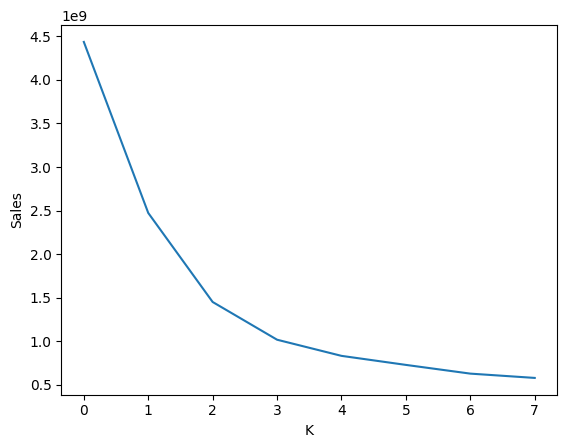

In [18]:
#Elbow method to detect number of K
from kmodes.kprototypes import KPrototypes

Sales = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(store_data2_new1_Matrix, categorical = catColumnsPos)
        Sales.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(Sales)
plt.xlabel('K')
plt.ylabel('Sales')
plt.show


In [19]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,9), 
        y=Sales, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 3 clusters


In [22]:
#let's build the Kprototype model with 3 clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
store_data2_new1['clusters']= kprototype.fit_predict(store_data2_new1_Matrix, categorical = catColumnsPos)
store_data2_new1['clusters']


0       2
1       2
2       2
3       2
4       2
       ..
9989    2
9990    2
9991    2
9992    2
9993    2
Name: clusters, Length: 9994, dtype: uint16

In [21]:
#predict the labels of clusters.
label = kprototype.fit_predict(store_data2_new1_Matrix, categorical = catColumnsPos)
print(label)

[2 2 2 ... 2 2 2]


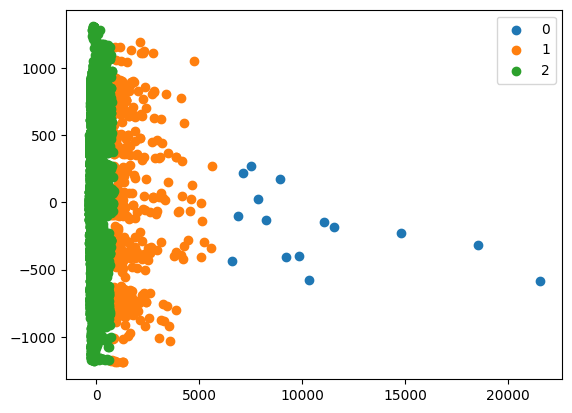

In [23]:
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
 
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1], label = i)
plt.legend()
plt.show()

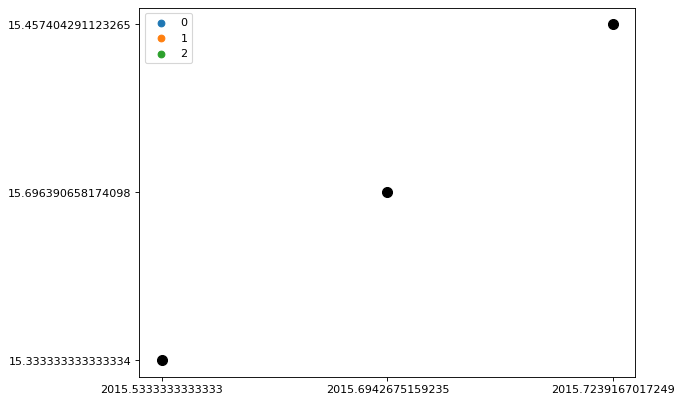

In [24]:
#Getting the Centroids of each cluster
from matplotlib.pyplot import figure

centroids = kprototype.cluster_centroids_
u_labels = np.unique(label)
figure(figsize=(8, 6), dpi=80)

#plotting the results:
 
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

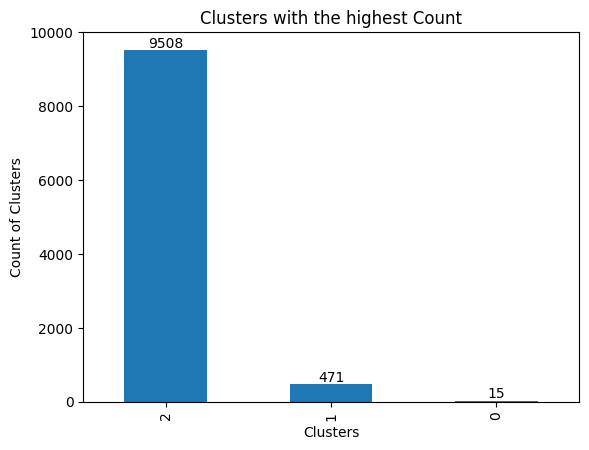

In [28]:
#the volume of each cluster
ax=store_data2_new1['clusters'].value_counts().plot(kind='bar')
plt.ylim(0,10000)
# add values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
#addlabels(x,y)

# add title and axis labels
plt.title('Clusters with the highest Count')
plt.xlabel('Clusters')
plt.ylabel('Count of Clusters')

# show the plot
plt.show()

In [26]:
#stats of numerical data by mean
store_data2_new1.groupby(['clusters']).mean()

/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_18350/3950411354.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_data2_new1.groupby(['clusters']).mean()


,Oyears,Odays,Omonths,SYear,SMonth,SDays,Sales,Quantity,Discount,Profit
clusters,,,,,,,,,,
0,2015.533333,15.333333,7.400000,2015.533333,7.400000,19.266667,10608.891067,5.466667,0.133333,2578.443113
1,2015.694268,15.696391,7.963907,2015.707006,7.940552,15.575372,1801.535099,5.887473,0.130425,246.482126
2,2015.723917,15.457404,7.802692,2015.739272,7.733908,15.893668,135.627310,3.683004,0.157516,13.843847


In [27]:
#stats of categorical data by mode
store_data2_new1.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[['Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']]


,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
clusters,,,,,,,,,,,
0,Standard Class,AB-10105,Adrian Barton,Consumer,New York City,New York,East,TEC-CO-10004722,Technology,Machines,Canon imageCLASS 2200 Advanced Copier
1,Standard Class,BB-11545,Brenda Bowman,Consumer,New York City,California,West,OFF-BI-10001359,Technology,Chairs,Fellowes PB500 Electric Punch Plastic Comb Bin...
2,Standard Class,WB-21850,William Brown,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
